# Compare theoretical Rabi frequencies of Raman transition experimental ones

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy
sympy.init_printing()
from IPython.display import Math
from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j

## Parameters

In [167]:
wavelength = 795*1e-9       # [m] Wavelength of Raman beams
delta = 2*np.pi*105*1e9     # [rad s^-1] Detuning of Raman beams from the intermediate state

### Raman 1 (D) beam waist

Since we cannot directly measure the beam waist of Raman 1 D at the atom position, we infer it from the beam waist at collimator and the traveling distance.

In [168]:
w0R1D = 1.25*1e-3                   # [m] Beai waist @ fiber output
zr = np.pi*w0R1D**2/wavelength      # [m] Raleigh length
z = 1                               # [m] Distance from a spot
w0R1D = w0R1D*np.sqrt(1+z**2/zr**2)    # [m] Beam waist @ atoms

### Raman 1 (H) beam waist
We can directly measure the beam waist of Raman 1 H by PCO.

In [169]:
w0R1H = np.sqrt(0.381*0.343)*1e-3   # [m] Beam waist @ atoms

### Raman 2 beam waist
We can directly measure the beam waist of Raman 2 by Chameleon 3.

In [170]:
w0R2 = np.sqrt(0.111*0.081)*1e-3    # [m] Beam waist @ atoms

## Measured Rabi frequencies

In [171]:
rabiFreqR1D_Experiment = np.array([85.9, 60.6, 30.2, 14.7])
rabiFreqR1D_err_Experiment = np.array([7.7, 3.9, 1.4, 0.7])
rabiFreqR1H_Experiment = np.array([71.1, 49.0, 23, 11.2])
rabiFreqR1H_err_Experiment = np.array([6.2, 4.2, 1.2, 0.5])

powerR1D_Experiment = 19.5*1e-3*np.array([1,1/2,1/4,1/8])     # [W]
powerR1H_Experiment = 1.17*1e-3*np.array([1,1/2,1/4,1/8])     # [W]
powerR2_Experiment = 13.6*1e-3*np.array([1,1/2,1/4,1/8])      # [W]

### Beam Intensity
There are two things we must take into consideration in calculating Rabi frequencies of Raman transition in our experimental system.  
1. The Raman 1 D beam is circularly polarized because it goes through the $\lambda/4$ used for probe light.   
2. The Raman 2 is linearly polarized along z-axis while the B-field is applied along x-axis during Raman pulse.   

Because of these facts, only half of the bare electric fields of Raman 1 H and Raman 2 contribute to Raman transitions.  
Here, we take them into account by halving bare intensities of Raman 1 H and 2.


In [172]:
intensityR1D_Experiment = 2*powerR1D_Experiment/(np.pi*w0R1D**2) # [W/m^2]
intensityR1H_Experiment = powerR1H_Experiment/(np.pi*w0R1H**2) # [W/m^2]
intensityR2_Experiment = powerR2_Experiment/(np.pi*w0R2**2)    # [W/m^2]

meanIntensityR1DR2_Experiment = np.sqrt(intensityR2_Experiment*intensityR1D_Experiment)
meanIntensityR1HR2_Experiment = np.sqrt(intensityR2_Experiment*intensityR1H_Experiment)

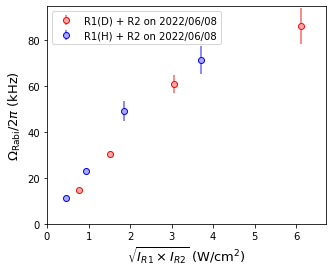

In [173]:
fig = plt.figure(figsize = [5,4])
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\sqrt{I_{R1} \times I_{R2}}$ (W/cm$^2$)', fontsize = 13)
ax1.set_ylabel(r'$\Omega_{\rm Rabi} / 2\pi $ (kHz)', fontsize = 13)
ax1.errorbar(meanIntensityR1DR2_Experiment*1e-4, rabiFreqR1D_Experiment, rabiFreqR1D_err_Experiment, fmt = 'o', c='#ff6666', mec='r', mfc='#ffaaaa', label = 'R1(D) + R2 on 2022/06/08')
ax1.errorbar(meanIntensityR1HR2_Experiment*1e-4, rabiFreqR1H_Experiment, rabiFreqR1H_err_Experiment, fmt = 'o', c='#6666ff', mec='b', mfc='#aaaaff', label = 'R1(H) + R2 on 2022/06/08')
ax1.set_xlim([0, np.max(meanIntensityR1DR2_Experiment*1e-4)*1.1])
ax1.set_ylim([0, np.max(rabiFreqR1D_Experiment)*1.1])
ax1.legend()

## Theoretical Rabi frequencies

Definition of Raman transition:
\begin{equation}
\Omega_{\rm Rabi} [{\rm rad} \cdot {\rm Hz}] = \frac{\left< J^{\prime} || d || J \right>^2}{2 \delta \hbar^2} E_1 \ E_2^{\ast} \left| G_{11} G_{22} \right|
\end{equation}

### Physical Constants

In [174]:
c = 2.99792458*1e8         # [m/s] Speed of light
epsilon_0 = 8.854187*1e-12 # [F/m] Permittivity of Vacuum
hbar = 1.054571*1e-34      # [rad^-1 J s] Reduced Plank's constant
jdj = 2.5377*1e-29         # [C m] Reduced dipole matrix element for D1 transition of 87Rb

### Transition Parameters

#### G11

In [175]:
f = 2       # Total angular momentum for initial state
fe = 2      # Total angular momentum for intermediate state
mf = -2     # Magnetic sublevel for initial state
mfe = -2    # Magnetic sublevel for intermediate state
j = 1/2     # Angular momentum for initial state
je = 1/2    # Angular momentum for intermediate state
nuc = 3/2   # Nuclear spin for 87 Rb
q = 0       # Polarization of light
g11 = (-1)**(2*fe+j+nuc+mf)*np.sqrt((2*f+1)*(2*fe+1)*(2*j+1))*float(wigner_3j(fe,1,f,mfe,q,-mf)*wigner_6j(j,je,1,fe,f,nuc))

#### G22

In [176]:
f = 1       # Total angular momentum for initial state
fe = 2      # Total angular momentum for intermediate state
mf = -1     # Magnetic sublevel for initial state
mfe = -2    # Magnetic sublevel for intermediate state
j = 1/2     # Angular momentum for initial state
je = 1/2    # Angular momentum for intermediate state
nuc = 3/2   # Nuclear spin for 87 Rb
q = 1       # Polarization of light
g22 = (-1)**(2*fe+j+nuc+mf)*np.sqrt((2*f+1)*(2*fe+1)*(2*j+1))*float(wigner_3j(fe,1,f,mfe,q,-mf)*wigner_6j(j,je,1,fe,f,nuc))

### Calculate Rabi frequeices

In [177]:
meanIntensity_Calculation = np.linspace(0, np.max(np.append(meanIntensityR1DR2_Experiment, meanIntensityR1HR2_Experiment)),100)
electricFieldStrength_Calculation = np.sqrt(2*meanIntensity_Calculation/(c*epsilon_0))  # [kg m A^-1 s^-3] Electric field strength
rabiFrequency_Calculation = 1/(2*np.pi)*jdj**2/(2*delta*hbar**2)*electricFieldStrength_Calculation**2*np.abs(g11*g22) #[Hz]

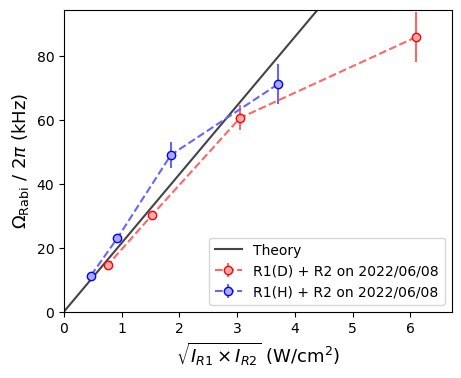

In [178]:
fig = plt.figure(figsize = [5,4], dpi=100)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\sqrt{I_{R1} \times I_{R2}}$ (W/cm$^2$)', fontsize = 13)
ax1.set_ylabel(r'$\Omega_{\rm Rabi} \ / \ 2\pi $ (kHz)', fontsize = 13)
ax1.errorbar(meanIntensityR1DR2_Experiment*1e-4, rabiFreqR1D_Experiment, rabiFreqR1D_err_Experiment, fmt = 'o--', c='#ff6666', mec='r', mfc='#ffaaaa', label = 'R1(D) + R2 on 2022/06/08')
ax1.errorbar(meanIntensityR1HR2_Experiment*1e-4, rabiFreqR1H_Experiment, rabiFreqR1H_err_Experiment, fmt = 'o--', c='#6666ff', mec='b', mfc='#aaaaff', label = 'R1(H) + R2 on 2022/06/08')
ax1.plot(meanIntensity_Calculation*1e-4, rabiFrequency_Calculation*1e-3, c='#444444', zorder=1, label='Theory')

ax1.set_xlim([0, np.max(meanIntensityR1DR2_Experiment*1e-4)*1.1])
ax1.set_ylim([0, np.max(rabiFreqR1D_Experiment)*1.1])
ax1.legend()

## Previously measured Rabi frequencies

In [189]:
w0R1D = 1.25*1e-3                   # [m] Beai waist @ fiber output
zr = np.pi*w0R1D**2/wavelength      # [m] Raleigh length
z = 1                               # [m] Distance from a spot
w0R1D = w0R1D*np.sqrt(1+z**2/zr**2) # [m] Beam waist @ atoms
w0R1H = np.sqrt(0.381*0.343)*1e-3                    # [m] Beam waist @ atoms
w0R2 = 0.16*1e-3                    # [m] Beam waist @ atoms

In [190]:
rabiFreqR1D_PreviousExperiment = np.array([67])
rabiFreqR1D_err_PreviousExperiment = np.array([2])
rabiFreqR1H_PreviousExperiment = np.array([64])
rabiFreqR1H_err_PreviousExperiment = np.array([2])

powerR1D_PreviousExperiment = 19.5*1e-3*np.array([1])     # [W]
powerR1H_PreviousExperiment = 1.17*1e-3*np.array([1])     # [W]
powerR2_PreviousExperiment = 13.6*1e-3*np.array([1])      # [W]

In [191]:
intensityR1D_PreviousExperiment = 2*powerR1D_PreviousExperiment/(np.pi*w0R1D**2) # [W/m^2]
intensityR1H_PreviousExperiment = powerR1H_PreviousExperiment/(np.pi*w0R1H**2) # [W/m^2]
intensityR2_PreviousExperiment = powerR2_PreviousExperiment/(np.pi*w0R2**2)    # [W/m^2]

meanIntensityR1DR2_PreviousExperiment = np.sqrt(intensityR2_PreviousExperiment*intensityR1D_PreviousExperiment)
meanIntensityR1HR2_PreviousExperiment = np.sqrt(intensityR2_PreviousExperiment*intensityR1H_PreviousExperiment)

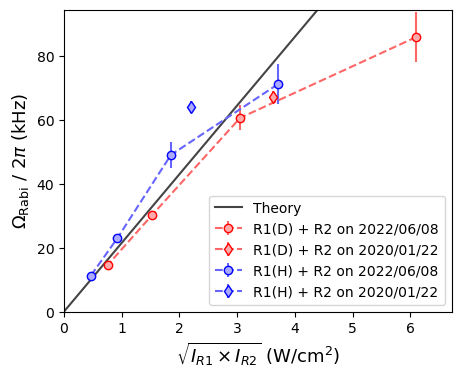

In [195]:
fig = plt.figure(figsize = [5,4], dpi=100)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\sqrt{I_{R1} \times I_{R2}}$ (W/cm$^2$)', fontsize = 13)
ax1.set_ylabel(r'$\Omega_{\rm Rabi} \ / \ 2\pi $ (kHz)', fontsize = 13)
ax1.errorbar(meanIntensityR1DR2_Experiment*1e-4, rabiFreqR1D_Experiment, rabiFreqR1D_err_Experiment, fmt = 'o--', c='#ff6666', mec='r', mfc='#ffaaaa', label = 'R1(D) + R2 on 2022/06/08')
ax1.errorbar(meanIntensityR1DR2_PreviousExperiment*1e-4, rabiFreqR1D_PreviousExperiment, rabiFreqR1D_err_PreviousExperiment, fmt = 'd--', c='#ff6666', mec='r', mfc='#ffaaaa', label = 'R1(D) + R2 on 2020/01/22')
ax1.errorbar(meanIntensityR1HR2_Experiment*1e-4, rabiFreqR1H_Experiment, rabiFreqR1H_err_Experiment, fmt = 'o--', c='#6666ff', mec='b', mfc='#aaaaff', label = 'R1(H) + R2 on 2022/06/08')
ax1.errorbar(meanIntensityR1HR2_PreviousExperiment*1e-4, rabiFreqR1H_PreviousExperiment, rabiFreqR1H_err_PreviousExperiment, fmt = 'd--', c='#6666ff', mec='b', mfc='#aaaaff', label = 'R1(H) + R2 on 2020/01/22')
ax1.plot(meanIntensity_Calculation*1e-4, rabiFrequency_Calculation*1e-3, c='#444444', zorder=1, label='Theory')
ax1.set_xlim([0, np.max(meanIntensityR1DR2_Experiment*1e-4)*1.1])
ax1.set_ylim([0, np.max(rabiFreqR1D_Experiment)*1.1])
ax1.legend()